<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/ivan-private-Lab4/Lab4/ivan-private_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Integration**
**Ivan Zivkovic**

# **Abstract**
In this lab we will implement functions for approximating integrals. We will deal with the 2-point Gauss quadrature over a unit interval, the 3-point edge midpoint quadrature over a reference triangle, Monte Carlo quadrature over a unit interval and Monte Carlo quadrature over a reference triangle. 

# **About the code**

This report is written by Ivan Zivkovic (ivanzi@kth.se)

In [385]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [386]:
# Load neccessary modules.


import numpy as np
import matplotlib.pyplot as plt


from typing import TypeAlias, Callable
T_NumpyVector: TypeAlias = np.ndarray
T_NumpyMatrix: TypeAlias = np.ndarray

# **Introduction**
### Gauss quadrature 

Quadrature is to approximate integrals by numerical methods. To approximate an integral we define a quadrature rule
$$\int_a^b f(x) \; dx \approx \sum_{i=0}^q f(x_i) w_i$$
with $q+1$ quadrature points $x_i \in [a, b]$ and quadrature weights $w_i \in R$. 

If the $q+1$ quadrature points are not required to be equally spaced, as it is for the Newton-Cotes formula, then they can be chosen so that the quadrature rule is exact for integrals of polynomial functions of degree $2q+1$. 

How it works is that you first choose a polynomial $\phi \in \mathcal{P}^{q+1}([a, b])$ which is orthogonal in the sense that:

$$\int_a^b \phi(x) s(x) \; dx = 0, \quad \forall s \in \mathcal{P}^{q}([a, b])$$

and there exist $q+1$ distinct zeros $x_i \in [a,b]$ for which $\phi(x_i) = 0$. Then rewrite a general polynomial $p \in \mathcal{P}^{2q+1}([a, b])$ as:

$$p(x) = \phi(x)s(x) + r(x), \quad s, r \in \mathcal{P}^{q}([a, b])$$

and select $q+1$ quadrature points $x_i$ such that $\phi(x_i) = 0$. It follows that $p(x_i) = r(x_i)$ and by interpolation of $r(x)$ using the Lagrange basis in $\mathcal{P}^{q}([a, b])$:

$$\int_a^b p(x) \; dx = \int_a^b \phi(x)s(x) \; dx + \int_a^b r(x) \; dx = \int_a^b r(x) \; dx$$

$$= \int_a^b \sum_{i=0}^q r(x_i) \lambda_i(x) \; dx = \sum_{i=0}^q r(x_i) \int_a^b \lambda_i(x) \; dx = \sum_{i=0}^q p(x_i) w_i$$

To determine the quadrature points and weights without knowing the associated orthogonal polynomial in advance, let $\{ \varphi_j(x) \}_{i=0}^{2q+1}$ be an arbitrary polynomial basis for $\mathcal{P}^{2q+1}([a,b])$ and let $\{ c_i \}_{i=0}^{2q+1}$ be the coordinates of a polynomial $p \in \mathcal{P}^{2q+1}([a,b])$. Then:

$$\int_a^b p(x) \; dx - \sum_{j=0}^q p(x_j) w_j = \sum_{i=0}^{2q+1} c_i \left( \int_a^b \varphi_i(x) \; dx - \sum_{j=0}^q \varphi_i(x_j) w_j \right)$$

from which we can determine the quadrature points and weights from the system of equations:

$$\sum_{j=0}^q \varphi_i(x_j) w_j = \int_a^b \varphi_i(x) \; dx, \quad i = 0,...,2q+1$$


### Monte Carlo quadrature
Take a function $g : D \rightarrow R$ with the domain $D \subset R^d$, for which we want to approximate the integral 
$$\int_D g(x) \; dx$$

To approximate this with Monte Carlo quadrature first generate a random sample from the independent uniformly distributed random variable $X \sim U(D)$ with the state space equal to the domain of integration. Then let $\bar{g}$ be the sample mean of the random variable $g(X)$ with expected value $E[g] = E[g(X)]$. That is:
$$\bar{g} = \frac{1}{n} \sum_{i=1}^n g(x_i), \quad E[g] = \frac{1}{|D|} \int_D g(x) \; dx$$

By the law of large numbers, for large $n$ we have that $\bar{g} \approx E[g]$. So the Monte Carlo quadrature is simply to multiple times randomly pick points, $x_i$, in the domain $D$ and use it in a 1-point quadrature for that points, and sum them up and take the average.
$$\int_D g(x) \; dx \approx \frac{|D|}{n} \sum_{i=1}^n g(x_i) = \frac{1}{n} \sum_{i=1}^n g(x_i) |D|$$



# **Method**

## **2-point Gauss quadrature over a unit interval**
According to example 11.1 from the book, an interval $I = [a, b]$ can be mapped to the unit interval $\hat{I} = [0,1]$ by an affine function $F : \hat{I} \rightarrow I$ defined by:

$$x = F(\hat{x}) = a + (b-a) \hat{x}$$

and the corresponding mapped measure takes the form:

$$dx = |F'| d\hat{x} = |b-a| d\hat{x}$$

In this case we have that the interval $I = [-1, 1]$, so the affine map $F$ is:

$$x = F(\hat{x}) = -1 + 2\hat{x}$$

and the mapped measure:

$$dx = |F'| d\hat{x} = 2 d\hat{x}$$

The mapped measure is used to map quadrature weights from the unit interval to a general interval. 


According to example 11.3 from the book, the 2-point Gauss rule on the interval $[-1, 1]$ is given by $w_0 = w_1 = 1$, $x_0 = 1 / \sqrt{3}$ and $x_1 = - 1 / \sqrt{3}$. 

The two quadrature points $x_0$ and $x_1$ for the interval $[-1, 1]$ can be mapped to the two quadrature points $\hat{x}_0$ and $\hat{x}_1$ on the interval $[0, 1]$ as follows:

$$x = 2\hat{x} - 1 \Leftrightarrow \hat{x} = \frac{1}{2}(x+1)$$

$$\hat{x}_0 = \frac{1}{2} \left( \frac{1}{\sqrt{3}} + 1 \right)$$

$$\hat{x}_1 = \frac{1}{2} \left( 1 - \frac{1}{\sqrt{3}} \right)$$


To find the weights we can simply use the mapped measure 

$$dx = 2 d\hat{x} \Leftrightarrow \frac{1}{2} dx = d\hat{x}$$

This gives that 

$$\frac{1}{2} w_0 = \frac{1}{2} w_1 = \hat{w}_0 = \hat{w}_1$$

$$\hat{w}_0 = \hat{w}_1 = \frac{1}{2}$$

This works since the weights $w_0$ and $w_1$ are given by the integral of the Lagrange basis

$$w_i = \int_{-1}^1 \lambda_i(x) \; dx = 1$$

If we do a coordinate change to $\hat{x}$ we get the new weights as

$$\hat{w}_i = \int_0^1 \lambda_i(F(\hat{x})) \; d\hat{x} = \int_{-1}^1 \lambda_i(x) \; \frac{1}{2} dx = \frac{1}{2} \int_{-1}^1 \lambda_i(x) \; dx = \frac{1}{2} w_i = \frac{1}{2}$$

So, the 2-point Gauss rule for the unit interval $\hat{I} = [0, 1]$ is given by 

$$\hat{x}_0 = \frac{1}{2} \left( \frac{1}{\sqrt{3}} + 1 \right)$$

$$\hat{x}_1 = \frac{1}{2} \left( 1 - \frac{1}{\sqrt{3}} \right)$$

$$\hat{w}_0 = \hat{w}_1 = \frac{1}{2}$$


In [387]:
def gauss_quadrature_2_point_1d(f: Callable[[float], float]) -> float:
    x_0 = 0.5 * (1/np.sqrt(3) + 1)
    x_1 = 0.5 * (-1/np.sqrt(3) + 1)
    w_0 = w_1 = 0.5
    return w_0 * f(x_0) + w_1 * f(x_1)


## **3-point edge midpoint quadrature over a reference triangle**
According to Example 11.5 from the book, A 3-point rule which is exact for quadratic integrands is obtained by choosing the quadrature points as the midpoints of the three edges of the reference triangle, with weights $w_0 = w_1 = w_2 = 1/6$, motivated by the symmetry of the quadrature points.

In [388]:
def gauss_quadrature_3_point_2d(f: Callable[[float, float], float]) -> float:
    w_0 = w_1 = w_2 = 1/6
    x_0 = (0.5, 0)
    x_1 = (0, 0.5)
    x_2 = (0.5, 0.5)
    return w_0 * f(*x_0) + w_1 * f(*x_1) + w_2 * f(*x_2)


## **Monte Carlo quadrature over a unit interval**
To approximate an integral with Monte Carlo quadrature first we generate a random sample from the independent uniformly distributed random variable $X \sim U([0, 1])$. Then let $\bar{f}$ be the sample mean of the random variable $f(X)$ with expected value $E[f] = E[f(X)]$. That is:
$$\bar{f} = \frac{1}{n} \sum_{i=1}^n f(x_i), \quad E[f] = \int_0^1 f(x) \; dx$$

By the law of large numbers, for large $n$ we have that $\bar{f} \approx E[f]$. So the Monte Carlo quadrature over a unit interval is simply to multiple times randomly pick points, $x_i$, in the domain $[0,1]$ and use it in a 1-point quadrature for that points, and sum them up and take the average.
$$\int_0^1 f(x) \; dx \approx \frac{1}{n} \sum_{i=1}^n f(x_i)$$

In [389]:
def monte_carlo_integration_1d(f: Callable[[float], float], N_quadrature_samples = 1000) -> float:
    x = np.random.uniform(size=(N_quadrature_samples, ))
    return np.sum(f(x)) / N_quadrature_samples


## **Monte Carlo quadrature over a reference triangle**
Let $\hat{T}$ be the reference triangle defined in $R^2$ by the vertices: $(0,0)$, $(0,1)$ and $(1,0)$. 

To approximate this with Monte Carlo quadrature first generate a random sample from the independent uniformly distributed random variable $X \sim U(\hat{T})$.

It is the same principle as before when we did Monte Carlo quadrature over a unit interval, only that now because the sampled points lie in the reference triangle $\hat{T}$ so we need to multiply the function evaluation by $|\hat{T}|$ to get a 1-point quadrature, this was not necessary before since the unit interval had a size of 1. 

$$\int_{\hat{T}} f(x, y) \; dxdy \approx \frac{|\hat{T}|}{n} \sum_{i=1}^n f(x_i)$$

Since $\hat{T}$ is the reference triangle, we have that $|\hat{T}| = 1/2$.

To make sure that the sample points lie within the reference triangle, we will first uniformly at random sample two numbers, $a$ and $b$, in the range $[0, 1]$. This will give a sample space that resembles a square with side lengths of 1. Then a transformation will be made if $a + b > 1$ so that the numbers are reflected, so that they will lie in the reference triangle as such (in pseudo-code):
$$a = 1-a$$
$$b = 1-b$$

In [390]:
def sample_points_in_unit_triangle(N_quadrature_samples: int) -> T_NumpyMatrix:
    a = np.random.uniform(size=(N_quadrature_samples, ))
    b = np.random.uniform(size=(N_quadrature_samples, ))
    
    i = np.argwhere(a+b > 1)

    a[i] = 1-a[i]
    b[i] = 1-b[i]

    return np.row_stack((a, b))
    

def monte_carlo_integration_2d(f: Callable[[float, float], float], N_quadrature_samples = 1000) -> float:
    x = sample_points_in_unit_triangle(N_quadrature_samples)
    return 0.5 * np.sum(f(x[0], x[1])) / N_quadrature_samples
    

# **Results**

## **2-point Gauss quadrature over a unit interval**

To test if the 2-point Gauss quadrature is correct, we will verify exact integration over the unit interval of a cubic polynomial $f(x)$:
$$f(x) = 4x^3 + 2x + 1$$
$$\int_0^1 f(x) \; dx = \int_0^1 4x^3 + 2x + 1 \; dx = \left[ x^4 + x^2 + x \right]_0^1 = 3$$

In [391]:
f = lambda x: 4*x**3 + 2*x + 1
print("Expected value of the integral above: 3")
print(f"Actual value of the 2-point Gauss quadrature: {gauss_quadrature_2_point_1d(f)}")

Expected value of the integral above: 3
Actual value of the 2-point Gauss quadrature: 3.0


## **3-point edge midpoint quadrature over a reference triangle**

To test if the 3-point edge midpoint quadrature is correct, we will verify exact integration over the reference triangle $\hat{T}$ of a quadratic polynomial $f(x, y)$: 
$$f(x, y) = 2x^2 + 4y^2$$


$$\int_{\hat{T}} f(x,y) \; dx dy = \int_0^1 \int_0^{1-x} 2x^2 + 4y^2 \; dy dx$$
$$= \int_0^1 \left[ 2 x^2y + \frac{4}{3}y^3 \right]_0^{1-x} \; dx$$
$$= \int_0^1 2x^2(1-x) + \frac{4}{3}(1-x)^3 \; dx$$
$$=\int_0^1  2x^2 - 2x^3 + \frac{4}{3}(1-x)^3 \; dx$$

$$= \left[ \frac{2}{3}x^3 - \frac{1}{2}x^4 - \frac{1}{3}(1-x)^4 \right]_0^1$$
$$= \frac{2}{3} - \frac{1}{2} + \frac{1}{3} = \frac{1}{2}$$

In [392]:
f = lambda x, y: 2*x**2 + 4*y**2 
print("Expected value of the integral above: 0.5")
print(f"Actual value of the 3-point Gauss quadrature: {gauss_quadrature_3_point_2d(f)}")

Expected value of the integral above: 0.5
Actual value of the 3-point Gauss quadrature: 0.5


## **Monte Carlo quadrature over a unit interval**

To test the Monte Carlo quadrature over a unit interval, we will plot the error against the number of quadrature points n and test if the convergence rate is proportional to $1 / \sqrt{n}$. The actual integral of $f(x)$:

$$f(x) = \sin(x)$$
$$\int_0^1 \sin(x) \; dx = \left[ -\cos(x) \right]_0^1 = 1 - \cos(1)$$

Expected value of the integral above: 1-cos(1), which is approximately: 0.45969769413186023
Value of the Monte Carlo integration with 10000 randomly sampled quadrature points: 0.457574532581074


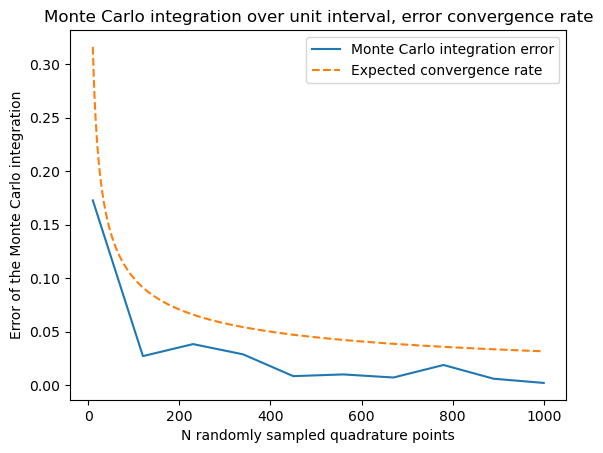

In [393]:
f = lambda x: np.sin(x)

expected_value = 1-np.cos(1)

print(f"Expected value of the integral above: 1-cos(1), which is approximately: {expected_value}")
print(f"Value of the Monte Carlo integration with 10000 randomly sampled quadrature points: {monte_carlo_integration_1d(f, 10000)}")


start = 10
stop = 1000
num = 10


N_iterations_inputs = np.linspace(start=start, stop=stop, num=num, dtype=np.int_)

v_monte_carlo_integration_1d = np.vectorize(monte_carlo_integration_1d, excluded=["f"])

monte_carlo_values = v_monte_carlo_integration_1d(f, N_iterations_inputs)
    
monte_carlo_errors = np.abs( expected_value - monte_carlo_values )

x_axis = np.linspace(start=start, stop=stop, num=stop, dtype=np.int_)
expected_convergence_rate = 1 / np.sqrt(x_axis) 

plt.plot(N_iterations_inputs, monte_carlo_errors, label="Monte Carlo integration error")
plt.plot(x_axis, expected_convergence_rate, "--",label="Expected convergence rate")


plt.xlabel("N randomly sampled quadrature points")
plt.ylabel("Error of the Monte Carlo integration")
plt.title("Monte Carlo integration over unit interval, error convergence rate")
plt.legend()

plt.show()

## **Monte Carlo quadrature over a reference triangle**

To test the Monte Carlo quadrature over a reference triangle $\hat{T}$, we will plot the error against the number of quadrature points n and test if the convergence rate is proportional to $1 / \sqrt{n}$. The actual integral of $f(x, y)$:

$$f(x, y) = 5x^3 + 3y - 6xy$$
$$\int_{\hat{T}} f(x, y) \; dxdy = \int_0^1 \int_0^{1-y} 5x^3 + 3y - 6xy \; dx dy$$
$$= \int_0^1 \left[ \frac{5}{4}x^4 + 3xy - 3x^2y \right]_0^{1-y} \; dy$$
$$= \int_0^1 \frac{5}{4} (1-y)^4 + 3(1-y)^2 - 3(1-y)^3 \; dy$$
$$= \left[ -\frac{1}{4}(1-y)^5 - (1-y)^3 + \frac{3}{4}(1-y)^4 \right]_0^1$$
$$= \frac{1}{4} + 1 - \frac{3}{4} = \frac{1}{2}$$

Expected value of the integral above: 0.5
Value of the Monte Carlo integration with 10000 randomly sampled quadrature points: 0.49779205197086956


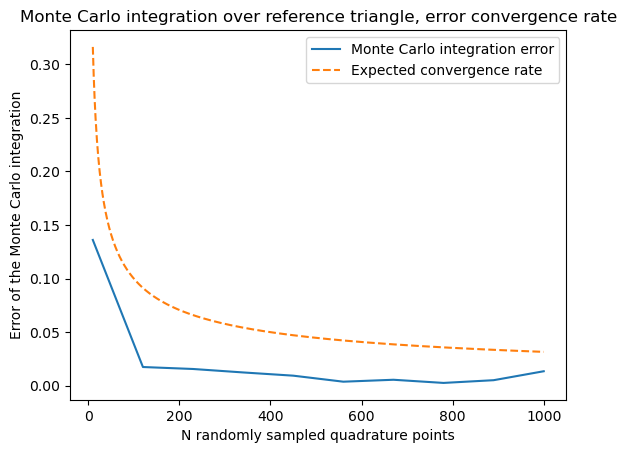

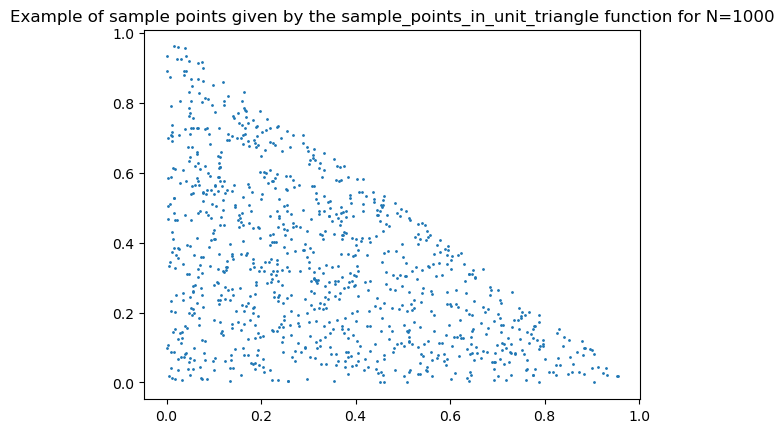

In [394]:
f = lambda x, y: 5*x**3 + 3*y - 6*x*y

expected_value = 0.5

print(f"Expected value of the integral above: {expected_value}")
print(f"Value of the Monte Carlo integration with 10000 randomly sampled quadrature points: {monte_carlo_integration_2d(f, 10000)}")


start = 10
stop = 1000
num = 10

N_sample_quadrature_points = np.linspace(start=start, stop=stop, num=num, dtype=np.int_)

v_monte_carlo_integration_2d = np.vectorize(monte_carlo_integration_2d, excluded=["f"])

monte_carlo_values = v_monte_carlo_integration_2d(f, N_sample_quadrature_points)

monte_carlo_errors = np.abs( expected_value - monte_carlo_values )

x_axis = np.linspace(start=start, stop=stop, num=stop, dtype=np.int_)
expected_convergence_rate = 1 / np.sqrt(x_axis) 

plt.plot(N_iterations_inputs, monte_carlo_errors, label="Monte Carlo integration error")
plt.plot(x_axis, expected_convergence_rate, "--",label="Expected convergence rate")


plt.xlabel("N randomly sampled quadrature points")
plt.ylabel("Error of the Monte Carlo integration")
plt.title("Monte Carlo integration over reference triangle, error convergence rate")
plt.legend()

plt.show()


x = sample_points_in_unit_triangle(1000)
plt.scatter(x[0], x[1], s=1)
plt.title("Example of sample points given by the sample_points_in_unit_triangle function for N=1000")
plt.show()

# **Discussion**

As we can see from the results, when we are dealing with polynomial of low degrees, it might be worth to calculate the quadrature points and weights beforehand. Afterward, you get a Gauss quadrature rule which you can "hard code" to get good performance and exact results for the integrals. When dealing with more complex functions that might have a higher dimensional domain, you could interpolate it and then use a Gauss quadrature rule, or much easier, use a Monte Carlo quadrature to get a good approximation of the desired integral with a much lower effort. 